---
title: "Fit line tutorial"
description: "This tutorial use shows how to generate a line based on points. Using the `ParametrizedLine` and `fit_line` from `kornia.gemetry.line`"
author:
    - "Edgar Riba"
date: 07-15-2022
categories:
    - Basic
    - Line
    - kornia.geometry
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/fit_line.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

In [ ]:
import matplotlib.pyplot as plt
import torch
from kornia.core import concatenate, stack
from kornia.geometry.line import ParametrizedLine, fit_line

In [ ]:
std = 1.2  # standard deviation for the points
num_points = 50  # total number of points

In [ ]:
# create a baseline
p0 = torch.tensor([0.0, 0.0])
p1 = torch.tensor([1.0, 1.0])

l1 = ParametrizedLine.through(p0, p1)
print(l1)

Origin: Parameter containing:
tensor([0., 0.], requires_grad=True)
Direction: Parameter containing:
tensor([0.7071, 0.7071], requires_grad=True)


In [ ]:
# sample some points and weights
pts, w = [], []
for t in torch.linspace(-10, 10, num_points):
    p2 = l1.point_at(t)
    p2_noise = torch.rand_like(p2) * std
    p2 += p2_noise
    pts.append(p2)
    w.append(1 - p2_noise.mean())
pts = stack(pts)
w = stack(w)

In [ ]:
# fit the the line
l2 = fit_line(pts[None, ...], w[None, ...])
print(l2)

# project some points along the estimated line
p3 = l2.point_at(-10)
p4 = l2.point_at(10)

Origin: Parameter containing:
tensor([[0.5933, 0.5888]], requires_grad=True)
Direction: Parameter containing:
tensor([[-0.7146, -0.6995]], requires_grad=True)


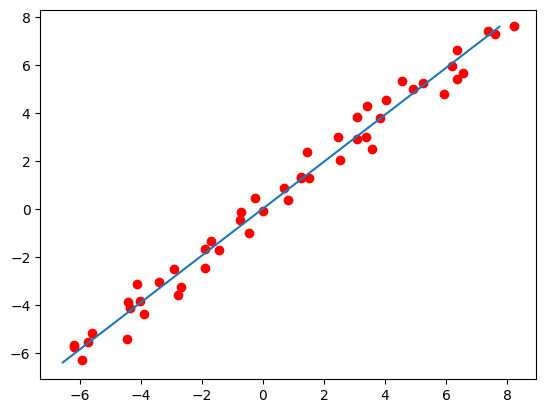

In [ ]:
X = concatenate((p3, p4), dim=0).detach().numpy()
X_pts = pts.detach().numpy()

plt.plot(X_pts[..., :, 0], X_pts[:, 1], "ro")
plt.plot(X[:, 0], X[:, 1])
plt.show()